In [5]:
import pandas as pd
df=pd.read_csv("Day19_1.csv")
df.head()
df.shape

(133, 132)

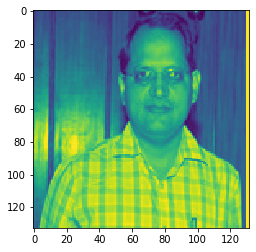

In [4]:
from skimage.io import imshow
import matplotlib.pyplot as plt

plt.imshow(df)
plt.show()

In [11]:
import pandas as pd
df1=pd.read_csv("Day19_2.csv")
df1.shape
print(133*132)

17556


In [12]:
x1=df1.values.reshape(133,132)
x1.shape

(133, 132)

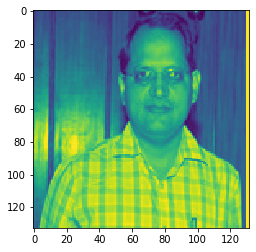

In [9]:
from skimage.io import imshow
import matplotlib.pyplot as plt

plt.imshow(x1)
plt.show()

In [19]:
#Image Classification: Take few photos of two persons,
#that will work as historical data. We will create a ML Model, which will
#take new image of any of the two person and identify him. Number of classes is 2.
# You can extend this problem for more than 2 images easily
from skimage.io import imshow,imread
import matplotlib.pyplot as plt

image_data=imread("D:\\BBAU1\\Image Classification\\6.jpg")
image_data.shape



(4032, 2268, 3)

In [21]:
#Printing the color value of one pixel
#Red=204 , Green=202, Blue=205
image_data[100][100]

Array([204, 202, 205], dtype=uint8)

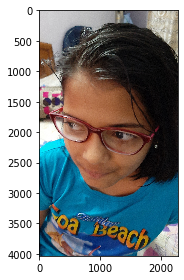

In [20]:
imshow(image_data)

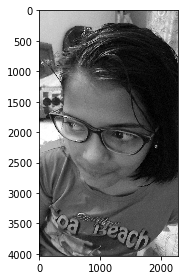

In [22]:
from skimage.io import imshow,imread

image=imread("D:\\BBAU1\\Image Classification\\6.jpg", as_gray=True)

imshow(image)

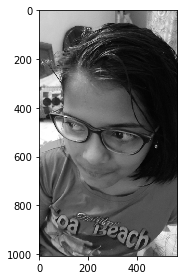

In [54]:
# Rescaling operation on image
from skimage.transform import rescale
image_rescaled=rescale(image,0.25)
imshow(image_rescaled)


In [61]:
image_rescaled.shape

(1008, 567)

In [29]:
#Reshape operation 
import numpy as np
total_pixel=1008*567
x1=np.reshape(image_rescaled, total_pixel)
print(x1.shape, total_pixel)

(571536,) 571536


In [30]:
x1

array([0.81349951, 0.79230219, 0.82231089, ..., 0.77056592, 0.79075597,
       0.79797337])

In [37]:
import pandas as pd
df=pd.read_csv("D:\\BBAU1\\Image Classification\\train.csv")
df.head()

,Image,Label
0,1.jpg,Icy
1,2.jpg,Icy
2,3.jpg,Icy
3,4.jpg,Icy
4,5.jpg,Icy


In [3]:
print(df.iloc[2].Image)

3.jpg


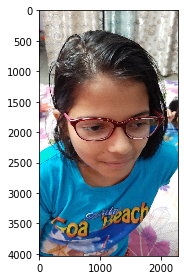

In [39]:
#Taking name of image file from csv file and reading image data
path="D:\\BBAU1\\Image Classification\\images\\" + df.iloc[17].Image
image=imread(path)
imshow(image)


In [40]:
image.shape

(4032, 2268, 3)

In [41]:
print(image[200][200])

[224 221 212]


In [42]:
#In any ML Algorithm implementation, You need data as X(feature) 
#and y(outcome), then only you can run fit function.
from skimage.io import imshow,imread
from skimage.transform import rescale
import numpy as np

rows=[]
for i in range(20):
    path="D:\\BBAU1\\Image Classification\\images\\" + df.iloc[i].Image
    image=imread(path)
    image_rescaled=rescale(image,0.25)
    #x1=np.reshape(image_rescaled, total_pixel)
    x1=np.reshape(image_rescaled, image_rescaled.shape[0]*image_rescaled.shape[1]*3)
    rows.append(x1)
    print(i)
X_train=pd.DataFrame(rows)

  


C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [43]:
X_train.shape

(20, 1714608)

In [44]:
y_train=df["Label"]

In [45]:
#Now we can apply Machine learning Algorithm
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
#now we have one machine learning model as nb
rows1=[]

path="D:\\BBAU1\\Image Classification\\3.jpg" 
image1=imread(path)
image_rescaled1=rescale(image,0.25)
    #x1=np.reshape(image_rescaled, total_pixel)
x2=np.reshape(image_rescaled, image_rescaled.shape[0]*image_rescaled.shape[1]*3)
rows1.append(x2)
    
new_image=pd.DataFrame(rows1)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


In [47]:
new_image.shape

(1, 1714608)

In [48]:
#ask model to predict outcome of this new image
y_predict=nb.predict(new_image)
print(y_predict)

['Saumya']


In [16]:
df=pd.read_csv("D:\\BBAU1\\Image Classification\\test.csv")
df.head()

,Image,Label
0,1.jpg,Icy
1,2.jpg,Icy
2,3.jpg,Saumya
3,4.jpg,Saumya


In [17]:
rows=[]
for i in range(4):
    path="D:\\BBAU1\\Image Classification\\test\\" + df.iloc[i].Image
    image=imread(path)
    image_rescaled=rescale(image,0.25)
    #x1=np.reshape(image_rescaled, total_pixel)
    x1=np.reshape(image_rescaled, image_rescaled.shape[0]*image_rescaled.shape[1]*3)
    rows.append(x1)
    print(i)
X_test=pd.DataFrame(rows)
X_test.shape

C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


0
1
2
3


(4, 571536)

In [18]:
y_test=df["Label"]
print(y_test)

0       Icy
1       Icy
2    Saumya
3    Saumya
Name: Label, dtype: object


In [19]:
y_predict=nb.predict(X_test)
print(y_predict)

['Saumya' 'Icy' 'Saumya' 'Saumya']


In [20]:
result=nb.score(X_test,y_test)
print(result)

0.75


In [22]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
print(svc.score(X_test,y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5


In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))

1.0


In [24]:
y_predict=knn.predict(X_test)
print(y_predict)

['Icy' 'Icy' 'Saumya' 'Saumya']


In [ ]:
#knn is working perfectly or best model for this problem

In [25]:
df=pd.read_csv("D:\\BBAU1\\Image Classification\\test1.csv")
df.head()

,Image,Label
0,1.jpg,Icy
1,2.jpg,Icy
2,3.jpg,Icy
3,4.jpg,Icy
4,5.jpg,Icy


In [26]:
rows=[]
for i in range(20):
    path="D:\\BBAU1\\Image Classification\\test1\\" + df.iloc[i].Image
    image=imread(path, as_gray=True)
    image_rescaled=rescale(image,0.25)
    #x1=np.reshape(image_rescaled, total_pixel)
    x1=np.reshape(image_rescaled, image_rescaled.shape[0]*image_rescaled.shape[1])
    rows.append(x1)
    print(i)
X_test1=pd.DataFrame(rows)
X_test1.shape

C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


(20, 571536)

In [28]:
y_test1=df["Label"]
print(y_test1)

0        Icy
1        Icy
2        Icy
3        Icy
4        Icy
5        Icy
6        Icy
7        Icy
8        Icy
9     Saumya
10    Saumya
11    Saumya
12    Saumya
13    Saumya
14    Saumya
15    Saumya
16    Saumya
17    Saumya
18    Saumya
19    Saumya
Name: Label, dtype: object


In [30]:
print(knn.score(X_test1,y_test1))
print(svc.score(X_test1,y_test1))
print(nb.score(X_test1,y_test1))
#overfitting the model
#therefore it is important to train and test data to be different

1.0
0.55
1.0


In [36]:
from PIL import Image
from PIL import ImageTk
from tkinter import Tk,Label,Button,Canvas,StringVar
from tkinter import filedialog
import tkinter

 
win = Tk() # Create instance

# Create a canvas that can fit the above image
canvas = Canvas(win, width = 500, height = 500)
canvas.grid(row=0)

labelText = StringVar()
tkinter.Label(win,fg='Red',font=("Helvetica", 40),textvariable=labelText).grid(row=1,column=0)
 
# Open an image file
def openImage():
    global photo
    rows2=[]
    fullfilename = filedialog.askopenfilename(initialdir="/", title="Select a file", filetypes=[("Image files", "*.jpg; *.png")]) # select png or jpg image file from the hard drive
    image =imread(fullfilename,as_gray=True)
    
    image1_rescaled = rescale(image, 0.25)
    x2=np.reshape(image1_rescaled, image1_rescaled.shape[0]*image1_rescaled.shape[1])
    rows2.append(x2)
    X_new = pd.DataFrame(rows2)
    y_new=knn.predict(X_new)
    print(y_new)
    
    
    # Use PIL (Pillow) to convert the NumPy ndarray to a PhotoImage
    photo = Image.open(fullfilename)
    photo = photo.resize((500, 400),Image.ANTIALIAS)
    photo = photo.rotate(270)
    photo = ImageTk.PhotoImage(photo)
    canvas.create_image(20,40,image=photo,anchor=tkinter.NW)
   
    message="This is looking like " + y_new
    labelText.set(message)
    
    # img = PhotoImage(file=fullfilename)
    
    
 
action_pic = Button(win, text="Open Image", command=openImage, padx=2)
action_pic.grid(row=2)



win.mainloop()


C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


['Saumya']
